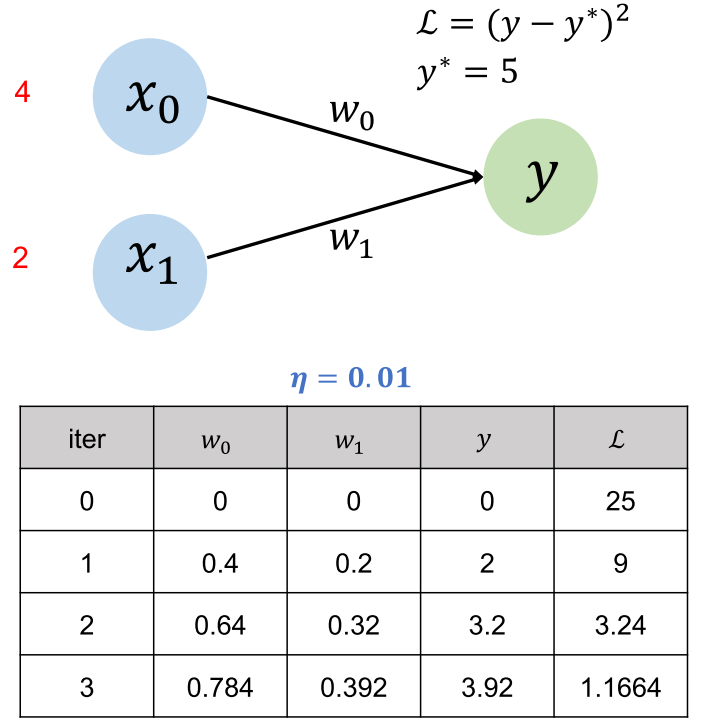

In [5]:
# convert to tensor for pytorch
import torch
x_data = torch.tensor([4.0, 2.0], dtype=torch.float32)
y_data = torch.tensor([5.0], dtype=torch.float32)
w1=torch.tensor([0.0], dtype=torch.float32, requires_grad = True)
w2=torch.tensor([0.0], dtype=torch.float32, requires_grad = True)

In [6]:
# forawrd
def forward(x):
    y_hat = x_data[0] * w1 + x_data[1] * w2
    y_data.add(y_hat)
    return y_hat

In [7]:
#loss funciton
def loss(x,y):
    y_pred=forward(x)
    return (y_pred-y)**2

In [8]:
loss(x_data,y_data)

tensor([25.], grad_fn=<PowBackward0>)

In [9]:
# Training loop
lr = 0.01
n_iter = 4
print("predict (before training)" , 4, forward(4))
for epoch in range(n_iter):
    for x_val, y_val in zip(x_data, y_data): #1
        l = loss(x_val, y_val) #2
        l.backward() #3
        print("grad: ", x_val, y_val, w1.grad.data, w2.grad.data)
        w1.data = w1.data - lr * w1.grad.data #4
        w2.data = w2.data - lr * w2.grad.data
        # Manually zero the gradients after updating weights
        w1.grad.data.zero_() #5
        w2.grad.data.zero_()

    print(f"Epoch: {epoch} | Loss: {l.item()}")
print("predict (after training)" , 4, forward(4))


predict (before training) 4 tensor([0.], grad_fn=<AddBackward0>)
grad:  tensor(4.) tensor(5.) tensor([-40.]) tensor([-20.])
Epoch: 0 | Loss: 25.0
grad:  tensor(4.) tensor(5.) tensor([-24.]) tensor([-12.])
Epoch: 1 | Loss: 9.0
grad:  tensor(4.) tensor(5.) tensor([-14.4000]) tensor([-7.2000])
Epoch: 2 | Loss: 3.2400007247924805
grad:  tensor(4.) tensor(5.) tensor([-8.6400]) tensor([-4.3200])
Epoch: 3 | Loss: 1.1664003133773804
predict (after training) 4 tensor([4.3520], grad_fn=<AddBackward0>)
